let's run the following cell to confirm that the GPU is detected.

In [ ]:

import tensorflow as tf

# Get the GPU device name.
device_name = tf.test.gpu_device_name()

# The device name should look like the following:
if device_name == '/device:GPU:0':
    print('Found GPU at: {}'.format(device_name))
else:
    raise SystemError('GPU device not found')



Found GPU at: /device:GPU:0


In order for torch to use the GPU, we need to identify and specify the GPU as the device. Later, in our training loop, we will load data onto the device.

In [ ]:
import torch


# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
from torch.utils.data import TensorDataset, random_split


There are 1 GPU(s) available.
We will use the GPU: Tesla K80


Here we extract the pickle file and load it into a pandas dataframe

In [ ]:
filename="/content/drive/My Drive/Colab Notebooks/anulap.pkl"
infile = open(filename,'rb')
new_dict = pickle.load(infile)
infile.close()
df=pd.DataFrame.from_dict(new_dict)

This function enables to extract the arguments of a java script function 

In [ ]:
def get_inputs(funct):
  b=None
  e=None
  for i in range(300):
    if funct[i]=='(':
      b=i
      break
  for i in range(300):
    if funct[i]==')':
      e=i
      break
  if len(funct[b:e+1].split(','))>1:
    return(tuple(funct[b:e+1].replace(' ','').replace('(','').replace(')','').split(',')))
  else:
    return(funct[b:e+1].replace('(','').replace(')','').replace(' ',''))

#example, let's run the function for all the available java script functions in our dataset
l=[]
for i in range(len(df)):
  l.append(get_inputs(df.iloc[i]['function']))
print(l)

['url', ('tabId', 'displayUrl'), ('id', 'details'), ('windowId', 'fileEntries'), 'details', 'details', 'details', 'details', ('href', 'lang', 'successCallback', 'failureCallback'), 'lang', ('properties', 'builtInEncoding', 'glyphNames'), 'contentDisposition', 'arr', 'layout', 'mode', ('index', 'views', 'top'), ('userAgent', 'maxPhoneWidth'), ('userAgent', 'maxPhoneWidth'), 'typeFilter', 'globDirectory', 'globDirectory', 'defaultDir', 'stats', 'providerId', ('appointment', 'provider', 'customer'), ('serviceId', '$div'), 'authResult', ('mean', 'n', 'newValue'), 'p', ('trials', 'probability'), ('func', 'start', 'end', 'maxIterations', 'errorTolerance'), ('x', 'chunkSize'), ('columns', 'rows'), ('mean1', 'n1', 'mean2', 'n2'), ('variance1', 'mean1', 'n1', 'variance2', 'mean2', 'n2'), 'z', 'x', 'n', 'n', 'n', 'x', ('mb/*:{b:number', 'm:number}*/'), 'elements', 'lambda', 'p', ('x', 'randomSource'), ('x', 'randomSource'), 'x', ('mean', 'n', 'value'), ('x', 'mean', 'standardDeviation'), 'config

In [ ]:
# a java script function looks like that *
print(df.iloc[5]['function'])

function isPdfFile(details) {
  var header = getHeaderFromHeaders(details.responseHeaders, "content-type");
  if (header) {
    var headerValue = header.value
      .toLowerCase()
      .split(";", 1)[0]
      .trim();
    if (headerValue === "application/pdf") {
      return true;
    }
    if (headerValue === "application/octet-stream") {
      if (details.url.toLowerCase().indexOf(".pdf") > 0) {
        return true;
      }
      var cdHeader = getHeaderFromHeaders(
        details.responseHeaders,
        "content-disposition"
      );
      if (cdHeader && /\.pdf(["']|$)/i.test(cdHeader.value)) {
        return true;
      }
    }
  }
  return false;
}


# Preprocessing step

Here we will perform some modifications to our functions, in order to only keep relevant informations (we will remove special characters, multiple spaces, prefixes, and then remove the first word "function" that is prensent in all our data, and finally we will convert scripts into lowercas)
we will add another column to our dataframe that contains modified functions

1.   List item
2.   List item



In [ ]:
texts = []
from nltk.stem import WordNetLemmatizer

def Preprocessing(text):
  # Remove all the special characters
  document = re.sub(r'\W', ' ', text)
  # Substituting multiple spaces with single space
  document = re.sub(r'\s+', ' ', document, flags=re.I)
  # Removing prefixed 'b'
  document = re.sub(r'^b\s+', ' ', document)
  #remove the first word (function)
  document =document[9:]
  document =document.lower()
  return(document)
for sen in range(len(df)):
    texts.append(Preprocessing(str(df.iloc[sen]['function'])))
texts[5]

df['stem function']=texts

df.head()



function  ...                                                                                                                                                                                            stem function
0  function parseExtensionURL(url) {\n    url = url.substring(CRX_BASE_URL.length);\n    // Find the (url-encoded) colon and verify that the scheme is whitelisted.\n    var schemeIndex = url.search(/...  ...  parseextensionurl url url url substring crx_base_url length find the url encoded colon and verify that the scheme is whitelisted var schemeindex url search 3a i if schemeindex 1 return undefined v...
1  function showPageAction(tabId, displayUrl) {\n    // rewriteUrlClosure in viewer.js ensures that the URL looks like\n    // chrome-extension://[extensionid]/http://example.com/file.pdf\n    var ur...  ...  showpageaction tabid displayurl rewriteurlclosure in viewer js ensures that the url looks like chrome extension extensionid http example com file pdf var url chrome extension a p 32 exec displayur...
2  function onExecuteFileBrowserHandler(id, details) {\n    if (id !== "open-as-pdf") {\n      return;\n    }\n    var fileEntries = details.entries;\n    // "tab_id" is the currently documented form...  ...  onexecutefilebrowserhandler id details if id open as pdf return var fileentries details entries tab_id is the currently documented format but it is inconsistent with the other chrome apis that use...
3  function openViewer(windowId, fileEntries) {\n    if (!fileEntries.length) {\n      return;\n    }\n    var fileEntry = fileEntries.shift();\n    var url = fileEntry.toURL();\n    // Use drive: al...  ...  openviewer windowid fileentries if fileentries length return var fileentry fileentries shift var url fileentry tourl use drive alias to get shorter more human readable urls url url replace filesys...
4  function isPdfDownloadable(details) {\n  if (details.url.includes("pdfjs.action=download")) {\n    return true;\n  }\n  // Display the PDF viewer regardless of the Content-Disposition header if th...  ...  ispdfdownloadable details if details url includes pdfjs action download return true display the pdf viewer regardless of the content disposition header if the file is displayed in the main frame s...

[5 rows x 4 columns]

Here we split our raw data base into training and test sets, the test set will be used to validate which model will be kept in the end

In [ ]:
df_train, df_test = train_test_split(df, test_size=0.2)
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
print( 'the shape of training set is ' + str(df_train.shape) ,'the shape of test set is ' + str(df_test.shape))

**Our procedure to solve the problem will be as follows:**


1.   Instead of the original formulation of the problem, we will rather try to get an **auxiliary classfication model**, that will predict the type of a variable (an argument of the function), according to the contexts of each occurence of the variable in the function's script. To this purpose, we will construct an **auxiliary database**, that contains a column of all the contexts of the variables of the functions that we have in the raw database (the original functions we have in the pickle file), and a column containing the type of each variable (in regards to its context)
2.   Afterwards, we will use our auxiliary problem to solve the original problem. Indeed, let's take a javascript function to which we should predict the types of the arguments. All we have to do is the extract the contexts of all the function's arguments, then use the auxiliary classification model to predict the type for each context of each argument, then we will gather the predictions of the type of each argument, then make the decision of which prediction to keep.
3. I know that my explanation isn't good! excuse me I'm writing it at 12pm and I'm half asleep!



This function enables to extract the context of a given variable, in a javascript function, "left" and "right" are hyperparameters that define the width of the context (it's like a signal processing window)

In [ ]:
#hyperparameters were chosen after some manual modification of their values, if I had more time and motivation I would perform a grid search to choose them
left=3
right=2
def get_contexts(var, text,left,right):
  list_words=text.split(' ')
  contexts=[]
  r=0
  for i in range(len(list_words)):
    if list_words[i]==var.lower() and r==0:
      contexts.append(list_words[:(i+right)])
      r=r+1
    elif list_words[i]==var.lower() and r!=0:
      try:
        contexts.append(list_words[(i-left):(i+right)])
        r=r+1        
      except ValueError:
       contexts.append(list_words[(i-left):])
       r=r+1
  for i in range(len(contexts)):
    contexts[i]=  ' '.join(contexts[i])
  return(contexts)



Here we will construct our auxiliary data base, composed of a contexts column, a variable name column, then a type of variable column

In [ ]:
X=[]
y=[]
var=[]
contexts=[]
for i in range(len(df_train)):
  types=df_train.iloc[i]['types'].split(',')
  inputs= get_inputs(df_train.iloc[i]['function'])
  if isinstance(inputs, tuple):
    for s in range(len(inputs)):
      contexts=get_contexts(inputs[s],df_train.iloc[i]['stem function'], left, right)
      for k in range(len(contexts)):
        X.append(contexts[k])
        y.append(types[s])
        var.append(inputs[s])


In [ ]:
data=pd.DataFrame(data={'context':X,'type':y, 'var':var})
data=data[data['context']!='']
data=data[data['context']!=' ']
data.head()

context    type   var
0             mapstep step min  number  step
1   max return maprange step 0  number  step
2         mapstep step min max  number   min
3             step 0 1 min max  number   min
4  mapstep step min max return  number   max

4906 4161 3676 2227 1463 584
          context   var
type                   
array        2227  2227
boolean       584   584
function     1463  1463
number       4906  4906
object       4161  4161
string       3676  3676


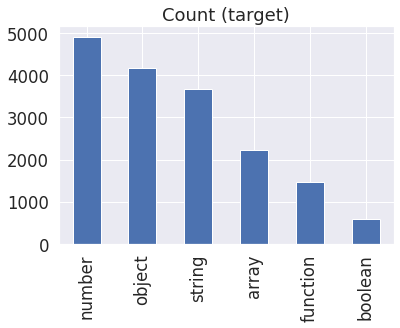

In [ ]:
count_object, count_string,count_number, count_array, count_function, count_boolean =data['type'].value_counts()
print(count_object, count_string,count_number, count_array, count_function, count_boolean)
print(data.groupby('type').count())
data['type'].value_counts().plot(kind='bar', title='Count (target)')

As we can see, our auxiliary database isn't balanced: the boolean label for instance is very rare, we will try cost sensitive learning or upsampling, but the results won't get anybetter

**First model: random forest**

We will use random forest after some preprocessing: bag of words + tfidf

We will split our auxiliary data base into train and test sets

In [ ]:
#bag of words and tfidf

X_train, X_test, y_train, y_test = train_test_split(data['context'], data['type'],  test_size=0.3)
X_train, X_test=np.array(X_train), np.array(X_test)

pipe = make_pipeline(CountVectorizer(max_features=1200, min_df=5, max_df=0.7, stop_words=stopwords.words('english')), TfidfTransformer())
''' max features is the maximal number of words used from the vocabulary, min_df corresponds to the minimum number of 
documents that should contain this feature. max_df corresponds to a percentage of the words kept from the whole dictionnary'''
pipe.fit(X_train)
X_train_trans = pipe.transform(X_train)

X_test_trans = pipe.transform(X_test)


print('the shape of the transformed training set ' + str(X_train_trans.shape) ,'the shape of the transformed test set ' +str(X_test_trans.shape))

the shape of the transformed training set (11911, 1200) the shape of the transformed test set (5106, 1200)


That's our 1st random forest classifier, we chose to use 300 estimators (number of the trees), we did it after some modification of the value of n_estimators, a very high n_estimators value can provoke overfitting. Again we could use a grid search but it's long and i'm lazy today

In [ ]:
classifier = RandomForestClassifier(n_estimators=300, random_state=0)
classifier.fit(X_train_trans, y_train) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = classifier.predict(X_test_trans)
print('the confusion matrix is as follows')
print(confusion_matrix(y_test,y_pred))
print('classification report for  a window width of: '+ str(left)+' elements in the left and '+str(right)+' elements in the right')
print(classification_report(y_test,y_pred))
y_train_pred=classifier.predict(X_train_trans)
print('train accuracy score is ---------------------------------'+ str(accuracy_score(y_train, y_train_pred))+'\n')
print('test accuracy score is --------------------------------'+ str(accuracy_score(y_test, y_pred)))

the confusion matrix is as follows
[[ 575    1   17   35   33   15]
 [   2  125    1   30    9   23]
 [   7    2  381   19   22   18]
 [  27    4   11 1345   16   65]
 [  28    3   24   51 1026   89]
 [  18    4   12  121   79  868]]
classification report for  a window width of: 3 elements in the left and 2 elements in the right
              precision    recall  f1-score   support

       array       0.88      0.85      0.86       676
     boolean       0.90      0.66      0.76       190
    function       0.85      0.85      0.85       449
      number       0.84      0.92      0.88      1468
      object       0.87      0.84      0.85      1221
      string       0.81      0.79      0.80      1102

    accuracy                           0.85      5106
   macro avg       0.86      0.82      0.83      5106
weighted avg       0.85      0.85      0.85      5106

train accuracy score is ---------------------------------0.9555033162622786

test accuracy score is --------------------------

The score is pretty interesting, we used **cost sensitive learning** to solve the unbalanced data set problem (as we can see in the previous results the precision of the 'boolean' prediction was lower than the precision of other labels). Nevertheless, the results were slightly worse. I chose not to show then in this notebook. Alternatively I will use **upsamlping**!

In [ ]:
ros = RandomOverSampler(random_state=0)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_trans, y_train)
classifier1 = RandomForestClassifier(n_estimators=300, random_state=0)
classifier1.fit(X_train_resampled, y_train_resampled) 
y_pred1 = classifier1.predict(X_test_trans)
print('the confusion matrix is as follows')
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
y_train_pred1=classifier1.predict(X_train_trans)
print('train accuracy score is ---------------------------------'+ str(accuracy_score(y_train, y_train_pred1)))
print('test accuracy score is --------------------------------'+ str(accuracy_score(y_test, y_pred1)))


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


the confusion matrix is as follows
[[ 576   23   23    9   32   13]
 [   3  153    1    7    9   17]
 [   5    8  393    9   17   17]
 [  36   82   21 1248   17   64]
 [  37   45   27   15  999   98]
 [  21   63   16   58   84  860]]
              precision    recall  f1-score   support

       array       0.85      0.85      0.85       676
     boolean       0.41      0.81      0.54       190
    function       0.82      0.88      0.85       449
      number       0.93      0.85      0.89      1468
      object       0.86      0.82      0.84      1221
      string       0.80      0.78      0.79      1102

    accuracy                           0.83      5106
   macro avg       0.78      0.83      0.79      5106
weighted avg       0.85      0.83      0.83      5106

train accuracy score is ---------------------------------0.9442532113172698
test accuracy score is --------------------------------0.8282412847630239


In the previous part, the model didn't take inconsideration the positions of each word in the context in regards to other words. Now we will use** Bert**'s model that is based on the **attention principle** (attention is all you need). 
I didn't want to use a RNN network (**LSTM **for instance) because I thought that the order of the words in a function doesn't matter that much to our classification problem, we'd rather chose a non directional model such as Bert to perform our classification.
Furthermore, we want to have few data and great results, that's why finetuning a pretrained model is a good idea.

We installed previously the hugging face transformers library and we will add a bert classification layer to our pretrained model

Bert Tokenization:
To feed our text to BERT, it must be split into tokens, and then these tokens must be mapped to their index in the tokenizer vocabulary.

The tokenization must be performed by the tokenizer included with BERT.
The below cell will download this for us. We’ll be using the “uncased” version here.

In [ ]:
# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


Let's apply the tokanizer for one sentence and see what happens

In [ ]:
# Print the original sentence.
print(' Original: ', data.iloc[0]['context'])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(data.iloc[0]['context']))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(data.iloc[0]['context'])))

 Original:  mapstep step min
Tokenized:  ['maps', '##te', '##p', 'step', 'min']
Token IDs:  [7341, 2618, 2361, 3357, 8117]


The bert model needs a special format:

We are required to:

Add special tokens to the start [CLS] and end [SEP] of each sentence.
Pad and truncate all sentences to a single constant length.
Explicitly differentiate real tokens from padding tokens with the “attention mask”.

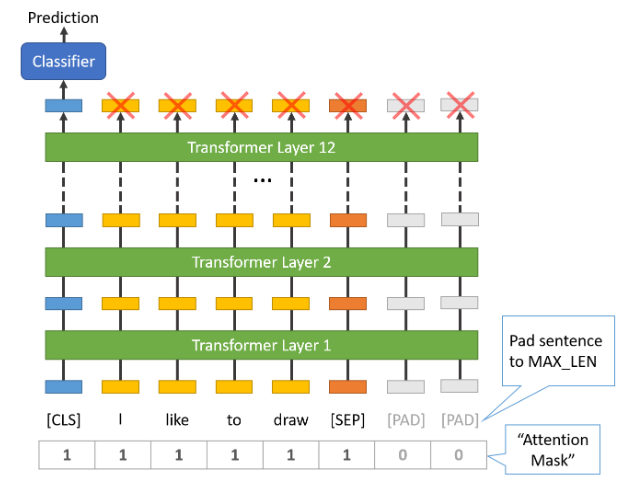

In [ ]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
labels1=['array','boolean','function','number','object','string']
le = preprocessing.LabelEncoder()
le.fit(labels1)
data['encoded labels']=le.transform(data['type'].values)
labels_numb=data['encoded labels'].values
input_ids = []
attention_masks = []

# For every sentence...
for sent in data['context']:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels_numb)

# Print sentence 0, now as a list of IDs.
print('Original: ', data['context'][900])
print('Token IDs:', input_ids[900])

Original:  y dst 1 y if
Token IDs: tensor([  101,  1061, 16233,  2102,  1015,  1061,  2065,   102,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])


In [ ]:
# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 90-10 train-validation split.

# Calculate the number of samples to include in each set.
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} validation samples'.format(val_size))


15,315 training samples
1,702 validation samples


We’ll also create an iterator for our dataset using the torch DataLoader class. This helps save on memory during training because, unlike a for loop, with an iterator the entire dataset does not need to be loaded into memory.

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

We’ll be using BertForSequenceClassification. This is the normal BERT model with an added single linear layer on top for classification that we will use as a sentence classifier. As we feed input data, the entire pre-trained BERT model and the additional untrained classification layer is trained on our specific task.

OK, let’s load BERT! There are a few different pre-trained BERT models available. “bert-base-uncased” means the version that has only lowercase!

In [ ]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 6, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

Here we can browse all of the model’s parameters by name.

I’ve printed out the names and dimensions of the weights for:

The embedding layer.
The first of the twelve transformers.
The output layer.

In [ ]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

For the purposes of fine-tuning, the authors recommend choosing from the following values (from Appendix A.3 of the BERT paper):

Batch size: 16, 32
Learning rate (Adam): 5e-5, 3e-5, 2e-5
Number of epochs: 2, 3, 4
We chose:

Batch size: 32 (set when creating our DataLoaders)

Learning rate: 2e-5

Epochs: 3 

The epsilon parameter eps = 1e-8 is “a very small number to prevent any division by zero in the implementation” (from here).

In [ ]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 2e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [ ]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
# We chose to run for 3
epochs = 3

# Total number of training steps is [number of batches] x [number of epochs]. 
# (Note that this is not the same as the number of training samples).
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [ ]:

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [ ]:
import time
import datetime
# Define a helper function for calculating accuracy.
def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [ ]:
import random
print(torch.__version__)

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128

# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# We'll store a number of quantities such as training and validation loss, 
# validation accuracy, and timings.
training_stats = []

# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        # It returns different numbers of parameters depending on what arguments
        # arge given and what flags are set. For our useage here, it returns
        # the loss (because we provided labels) and the "logits"--the model
        # outputs prior to activation.
        loss, logits = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)
        loss.item()

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_train_loss = total_train_loss + loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    total_eval_accuracy = 0
    total_eval_loss = 0
    nb_eval_steps = 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using 
        # the `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            # Get the "logits" output by the model. The "logits" are the output
            # values prior to applying an activation function like the softmax.
            (loss, logits) = model(b_input_ids, 
                                   token_type_ids=None, 
                                   attention_mask=b_input_mask,
                                   labels=b_labels)
            
        # Accumulate the validation loss.
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences, and
        # accumulate it over all batches.
        total_eval_accuracy += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this validation run.
    avg_val_accuracy = total_eval_accuracy / len(validation_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_val_accuracy))

    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    
    # Measure how long the validation run took.
    validation_time = format_time(time.time() - t0)
    
    print("  Validation Loss: {0:.2f}".format(avg_val_loss))
    print("  Validation took: {:}".format(validation_time))

    # Record all statistics from this epoch.
    training_stats.append(
        {
            'epoch': epoch_i + 1,
            'Training Loss': avg_train_loss,
            'Valid. Loss': avg_val_loss,
            'Valid. Accur.': avg_val_accuracy,
            'Training Time': training_time,
            'Validation Time': validation_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))

1.5.1+cu101

======== Epoch 1 / 3 ========
Training...
  Batch    40  of    479.    Elapsed: 0:00:26.
  Batch    80  of    479.    Elapsed: 0:00:53.
  Batch   120  of    479.    Elapsed: 0:01:19.
  Batch   160  of    479.    Elapsed: 0:01:45.
  Batch   200  of    479.    Elapsed: 0:02:11.
  Batch   240  of    479.    Elapsed: 0:02:37.
  Batch   280  of    479.    Elapsed: 0:03:04.
  Batch   320  of    479.    Elapsed: 0:03:30.
  Batch   360  of    479.    Elapsed: 0:03:56.
  Batch   400  of    479.    Elapsed: 0:04:22.
  Batch   440  of    479.    Elapsed: 0:04:48.

  Average training loss: 0.77
  Training epcoh took: 0:05:14

Running Validation...
  Accuracy: 0.90
  Validation Loss: 0.34
  Validation took: 0:00:12

======== Epoch 2 / 3 ========
Training...
  Batch    40  of    479.    Elapsed: 0:00:26.
  Batch    80  of    479.    Elapsed: 0:00:52.
  Batch   120  of    479.    Elapsed: 0:01:18.
  Batch   160  of    479.    Elapsed: 0:01:45.
  Batch   200  of    479.    Elapsed: 0:02:1

The results are really satisfying compared to the validation score of the Random Forest classifier

In [ ]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# A hack to force the column headers to wrap.
#df = df.style.set_table_styles([dict(selector="th",props=[('max-width', '70px')])])

# Display the table.
df_stats

Training Loss  Valid. Loss  Valid. Accur. Training Time Validation Time
epoch                                                                         
1               0.77         0.34           0.90       0:05:14         0:00:12
2               0.25         0.22           0.94       0:05:13         0:00:12
3               0.14         0.20           0.95       0:05:13         0:00:12

The processing time is higher though, which is normal!

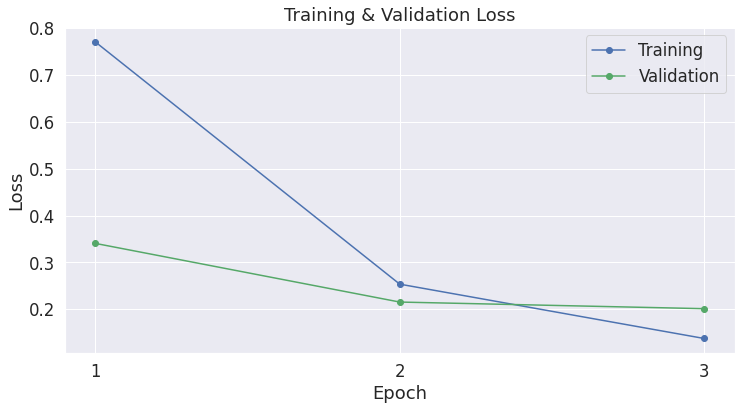

In [ ]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Valid. Loss'], 'g-o', label="Validation")

# Label the plot.
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2, 3])

plt.show()

We chose to stop at the third epoch, because the 4th epoch doesn't improve results

# **Now let's compare the results of the two previous auxiliary models ( Random forest and Bert )**

This function uses the auxiliary model to predict the type of the arguments of a given function: for an argument of the function, we will extract all the possible contexts of the argument (portions of texts with length left+right that contain the argument name), then we will use the auxiliary random forest model to get the probabilities (logits) in the form of a list, we then **sum** the logits vectors, and get the argmax value, which will correspond to the **predicted class**.

In [ ]:
#for random forest
def predict_type_function_RF(text, classifier, left, right):
  if type(get_inputs(text)) is tuple:
    inputs= list(get_inputs(text))
  else:
    inputs=[get_inputs(text)]
  dict={}
  for i in range(len(inputs)):
    contexts=get_contexts(inputs[i],Preprocessing(text),left, right)
    logits_sum=np.array([0]*len(data.type.unique()))
    for context in contexts:
      logits_sum= logits_sum + classifier.predict_proba(pipe.transform([context]))
    dict[inputs[i]]=labels1[np.argmax(logits_sum)]
  return(dict)

#example
print(predict_type_function_RF(df_test.iloc[50]['function'],classifier, left, right))
print(df_test.iloc[50]['types'])

{'code': 'string'}
string


Here we will measure the test score over the whole test dataset

In [ ]:
#helper function to compare two lists (one withe the predicted types of the arguments, the other with the real types of the arguments)
def compare_lists(list1,list2):
  l=[]
  for i in range(len(list1)):
    if list1[i]==list2[i]:
      l.append(1)
    else:
      l.append(0)
  return(sum(l)/len(l))

def accuracy_test_data_RF(df_test, classifier, left, right):
  l=[]
  for i in range(len(df_test)):
    dicti= predict_type_function_RF(df_test.iloc[i]['function'],classifier, left, right)
    list_prediction=list(dicti.values())
    list_test_data=df_test.iloc[i]['types'].split(',')
    l.append(compare_lists(list_prediction,list_test_data))
  return(sum(l)/len(l))
print('the accuracy of the classifier on the test functions data base is '+str(accuracy_test_data_RF(df_test, classifier, left, right)*100))

the accuracy of the classifier on the test functions data base is 74.06050357008644


The score is pretty acceptable, would Bert give better results?

In [ ]:
''' this function gives the Bert predictions for a given javascript function script in the shape of a vector of logits
'''
def predict_bert(text):
  encoded_dict = tokenizer.encode_plus(
                          text,                      # Sentence to encode.
                          add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                          max_length = 64,           # Pad & truncate all sentences.
                          pad_to_max_length = True,
                          return_attention_mask = True,   # Construct attn. masks.
                          return_tensors = 'pt',     # Return pytorch tensors.
                    )
  input_ids=[encoded_dict['input_ids']]
  attention_masks=[encoded_dict["attention_mask"]]
  input_ids = torch.cat(input_ids, dim=0)
  attention_masks = torch.cat(attention_masks, dim=0)
  labels = torch.tensor(le.transform([df_test.iloc[50]['types'].split(',')[0]]))
  batch_size = 32 

  prediction_data = TensorDataset(input_ids, attention_masks, labels)
  prediction_sampler = SequentialSampler(prediction_data)
  prediction_dataloader = DataLoader(prediction_data, sampler=prediction_sampler, batch_size=batch_size)

  # Prediction on test set

  # Put model in evaluation mode
  model.eval()

  # Tracking variables 
  predictions , true_labels = [], []

  # Predict 
  for batch in prediction_dataloader:
    # Add batch to GPU
    batch = tuple(t.to(device) for t in batch)
    
    # Unpack the inputs from our dataloader
    b_input_ids, b_input_mask, b_labels = batch
    
    # Telling the model not to compute or store gradients, saving memory and 
    # speeding up prediction
    with torch.no_grad():
        # Forward pass, calculate logit predictions
        outputs = model(b_input_ids, token_type_ids=None, 
                        attention_mask=b_input_mask)

    logits = outputs[0]

    # Move logits and labels to CPU
    logits = logits.detach().cpu().numpy()
    label_ids = b_labels.to('cpu').numpy()
    
    # Store predictions and true labels
    predictions.append(logits)
    true_labels.append(label_ids)

  return(predictions)

In [ ]:
# this function is the equivalent of predict_type_function_RF(text, classifier, left, right) but for Bert
def predict_type_function_bert(text, left, right):
  if type(get_inputs(text)) is tuple:
    inputs= list(get_inputs(text))
  else:
    inputs=[get_inputs(text)]
  dict={}
  for i in range(len(inputs)):
    contexts=get_contexts(inputs[i],Preprocessing(text),left, right)
    logits_sum=np.array([0]*len(data.type.unique()))
    for context in contexts:
      logits_sum = logits_sum + predict_bert(context)
    dict[inputs[i]]=labels1[np.argmax(logits_sum)]
  return(dict)
print(predict_type_function_bert(df_test.iloc[50]['function'], left, right))
print(df_test.iloc[50]['types'])

{'code': 'string'}
string


In [ ]:
# This function measures the accuracy score over all the test dataset
def accuracy_test_data_bert(df_test, left, right):
  l=[]
  for i in range(len(df_test)):
    dicti= predict_type_function_bert(df_test.iloc[i]['function'], left, right)
    list_prediction=list(dicti.values())
    list_test_data=df_test.iloc[i]['types'].split(',')
    l.append(compare_lists(list_prediction,list_test_data))
  return(sum(l)/len(l))

In [ ]:
print('the accuracy of bert on the test functions data base is '+str(accuracy_test_data_bert(df_test,  left, right)*100))

the accuracy of bert on the test functions data base is 83.70725291243893


The results are pretty good! 83.70% is better than nothing you know?

# Comments on the project and on what would have been done if more time had been allocated

## If I had more time, I would: 


*   Work more on the preprocessing step: Try to make the context extracting window more powerful (instead of two hyperparameters of left width and right width, I would add an **overlapping parameter**, when the contexts of **two different arguments** overlap)
*   Since a javascript functions doesn't have the syntax of a typical sentence, we could exploit the fact that the structure of it is typical and can be perceived as a tree, like this:
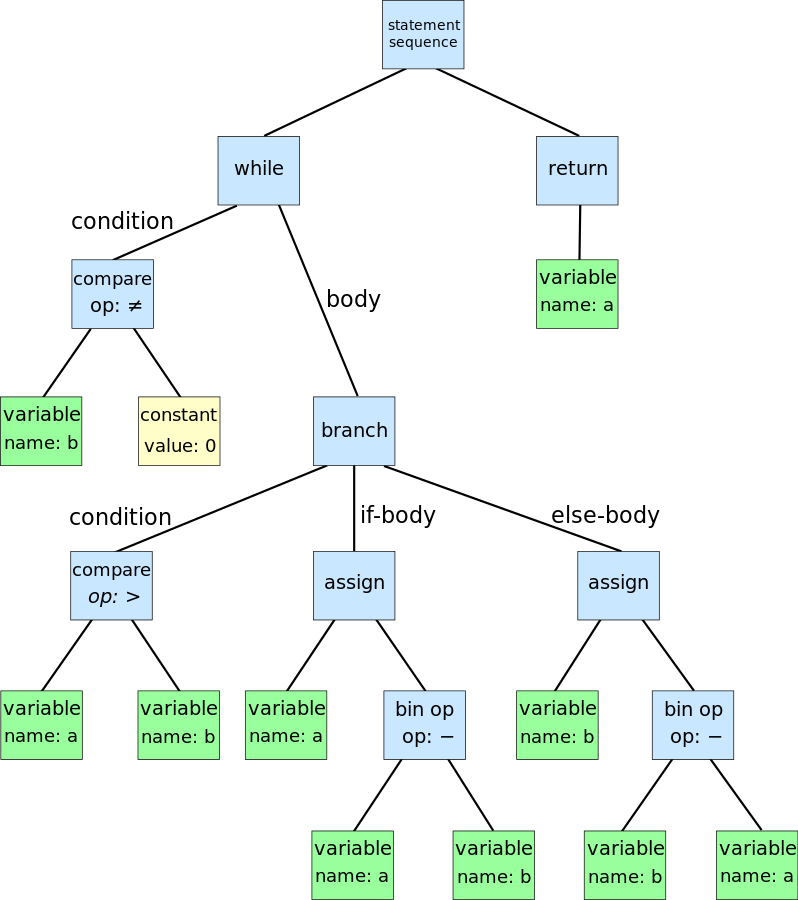

If we see it that way, things would be way easier because a tree representation is better to process than a text reprentation. We can use the 'lark' package to parse the javascript function and make it look like a tree!

